##### 데이터 전처리
  - 머신러닝 모델에 훈련 데이터를 입력하기전에 데이터를 가공
  - 각종시각화 도구를 통해 실제 데이터를 파악
  - 머신러닝 기초 수식  y= f(x)  

  - 데이터 품질 문제
    - 각 피처들의 데이터의 범위가 너무 다를때
    - 학습에 영향을 줌
      - 일부 머신러닝은 데이터가 크면 비중을 크게 잡음
      - 스케일을 맞춰줌( 데이터의 최대최소 0~1사이로 변경하거나 또는 표준정규분포 형태로 나타냄)

##### 결측치
  - 실제로 존재하지만 기록되지 않은 데이터
  - 결측치 처리 전략(도메인 지식에 기반)

##### 이상치
  - outlier : 극단적으로 크거나 작은 값
  - 단순히 데이터 분포의 차이와는 다름
  - 데이터 잘못기입 또는 특이현상

##### 데이터 처리 전략
  - 드랍 : 삭제
  - 채우기 : 평균,최빈,중간,이동평균... etc

In [ ]:
import pandas as pd
import numpy as np

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
            'age': [42, np.nan, 36, 24, 73],
            'sex': ['m', np.nan, 'f', 'm', 'f'],
            'preTestScore': [4, np.nan, np.nan, 2, 3],
            'postTestScore': [25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   first_name     4 non-null      object 
 1   last_name      4 non-null      object 
 2   age            4 non-null      float64
 3   sex            4 non-null      object 
 4   preTestScore   3 non-null      float64
 5   postTestScore  3 non-null      float64
dtypes: float64(3), object(3)
memory usage: 368.0+ bytes


In [ ]:
df.isnull().mean()

first_name       0.2
last_name        0.2
age              0.2
sex              0.2
preTestScore     0.4
postTestScore    0.4
dtype: float64

##### Drop

In [ ]:
df_no_missing =  df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df['location'] = np.nan
df.dropna(how='all', axis=1)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
df
df.dropna(thresh=1) # 데이터가 한개라도 존재하는 행은 남김

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
df
df.dropna(thresh=5) # 데이터가 한개라도 존재하는 행은 남김

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


##### 채우기
  - 결측치를 대처
  - fillna 사용

In [ ]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [ ]:
# 빈 값에 평균값을 채운다: 열단위로 평균값을 계산하고 해당 열에만 값을 채움
df['preTestScore'] = df['preTestScore'].fillna(df['preTestScore'].mean())
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [ ]:
df['postTestScore'].median()

62.0

In [ ]:
df['postTestScore'].fillna(df['postTestScore'].median())

0    25.0
1    62.0
2    62.0
3    62.0
4    70.0
Name: postTestScore, dtype: float64

In [ ]:
df['postTestScore'] = df.groupby('sex')['postTestScore'].transform('mean')

In [ ]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,43.5,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,43.5,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


##### 범주형 데이터 전처리
  - 판다스에서 제공하는 get_dummies함수
  - 사잇킷런에서 제공하는 OneHotEncoder, LabelEncoder

In [ ]:
edges = pd.DataFrame({'source': [0, 1, 2], 'target': [2, 2, 3],
                      'weight': [3, 4, 5], 'color': ['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [ ]:
edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  3 non-null      int64 
 1   target  3 non-null      int64 
 2   weight  3 non-null      int64 
 3   color   3 non-null      object
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [ ]:
pd.get_dummies(edges)

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [ ]:
pd.get_dummies(edges['color'])

,blue,red
0,0,1
1,1,0
2,1,0


In [ ]:
pd.get_dummies(edges[['color']])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


  - 단점
    - 컬럼의 갯수(피처,속성)가 늘어난다.
    - 학습대상이 늘어난다.
    - 리소스 증가하고, 속도가 느려진다.

##### 수치형 데이터를 범주형 데이터로 변경
  - 원핫을 적용한다.

In [ ]:
# 3: "M"  4:"L"  5:"XL"
weight_dic = {3 : "M", 4:"L", 5:"XL"}
edges['weight_sign'] = edges['weight'].map(weight_dic)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [ ]:
edges = pd.get_dummies(edges)
edges

,source,target,weight,color_blue,color_red,weight_sign_L,weight_sign_M,weight_sign_XL
0,0,2,3,0,1,0,1,0
1,1,2,4,1,0,1,0,0
2,2,3,5,1,0,0,0,1


##### 범주형 데이터로 변환하여 처리하기 : 바인딩
  - 바인딩 : 연속형 데이터를 범주형 데이터로 변환

In [ ]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [ ]:
df['postTestScore'].min(),df['postTestScore'].max()
# 0 ~ 100사이의 데이터로 25씩 구간을 나눠
# cut 함수 bins, labels
bins = [0,25,50,75,100]
bins_labels = ['Low','Okay','Good','Great']
categories = pd.cut(df['postTestScore'], bins=bins, labels=bins_labels)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [ ]:
# categories를 원핫으로 만들어서 원본에 합치기

In [ ]:
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [ ]:
pd.concat(  [df,  pd.get_dummies(categories)], axis = 1   )

,regiment,company,name,preTestScore,postTestScore,Low,Okay,Good,Great
0,Nighthawks,1st,Miller,4,25,1,0,0,0
1,Nighthawks,1st,Jacobson,24,94,0,0,0,1
2,Nighthawks,2nd,Ali,31,57,0,0,1,0
3,Nighthawks,2nd,Milner,2,62,0,0,1,0
4,Dragoons,1st,Cooze,3,70,0,0,1,0
5,Dragoons,1st,Jacon,4,25,1,0,0,0
6,Dragoons,2nd,Ryaner,24,94,0,0,0,1
7,Dragoons,2nd,Sone,31,57,0,0,1,0
8,Scouts,1st,Sloan,2,62,0,0,1,0
9,Scouts,1st,Piger,3,70,0,0,1,0


##### 피처 스케일링
  스케일링 : 데이터 간 범위를 맞춤

In [ ]:
# 키와 몸무게를 수집...(175, 65)
# 키가 몸무게에 비해 과다하게 모델에 영향을 줌
# min-max 스케일링
#  (x - min) / (max - min)  --> 이상치에 영향을 많이 받고
# z-score : 평균과 분산을이용해서 표준 정규분포형태로 : (x - 평균) / 표준편차   : 이상치에 영향을 적게받는

In [ ]:
df = pd.DataFrame(
    {'A':[14.00,90.20,90.95,96.27,91.21],
     'B':[103.02,107.26,110.35,114.23,114.68],
     'C':['big','small','big','small','small']})

df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [ ]:
# min-max스케일링 : (x - min) / (max-min)
(df['A'] - df['A'].min() ) / (df['A'].max() - df['A'].min() )
# scale 0~1사이로 변환

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [ ]:
# (x - 평균) / 표준편차
(df['B'] - df['B'].mean() ) / df['B'].std()

0   -1.405250
1   -0.540230
2    0.090174
3    0.881749
4    0.973556
Name: B, dtype: float64

##### 데이터 전처리 연습
  - kaggle

In [ ]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df = pd.concat( [train.drop(columns=['Survived']), test] )
df.shape

(1309, 11)

In [7]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [8]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df.notnull().sum()

PassengerId    1309
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64

In [10]:
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


In [11]:
df.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

In [12]:
# 성별에대한 나이 평균
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [13]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [19]:
df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform('mean'), inplace=True)

In [46]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [34]:
df.drop(columns='Cabin',axis=1,inplace=True)

In [45]:
df[df.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [47]:
df['Embarked'] = df['Embarked'].fillna('S')

In [48]:
df[df.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [56]:
df[(df['Pclass'] == 3) & (df['Sex'] == 'male') &(df['SibSp'] == 0) & (df['Parch'] == 0) & (df['Age'] > 58)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
94,95,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
116,117,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
280,281,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q
326,327,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S
851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [62]:
(7.2500 + 6.2375)//2

6.0

In [75]:
# df['Fare'] = df['Fare'].fillna(6.0)
df['Fare'][1043] = 6.0

<ipython-input-75-f45b0a8ee3cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][1043] = 6.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [86]:
object_cols = ['PassengerId', 'Pclass','Name','Sex','Ticket','Embarked']
numeric_columns = list(set(df.columns) - set(object_cols))
numeric_columns

['Parch', 'Age', 'SibSp', 'Fare']

In [87]:
for col_name in object_cols:
  df[col_name] = df[col_name].astype('object')
for col_name in numeric_columns:
  df[col_name] = df[col_name].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Pclass       1309 non-null   object 
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   float64
 6   Parch        1309 non-null   float64
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(4), object(6)
memory usage: 102.4+ KB


원핫 인코딩으로 처리하기
  - 범주형 데이터

In [97]:
one_hot_df =  pd.get_dummies(df[['Pclass','Sex','Embarked']])
one_hot_df

<ipython-input-97-5594663f53ec>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_df =  pd.get_dummies(df[['Pclass','Sex','Embarked']])


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1304,0,0,1,0,1,0,0,1
1305,1,0,0,1,0,1,0,0
1306,0,0,1,0,1,0,0,1
1307,0,0,1,0,1,0,0,1


In [99]:
pd.merge(df,one_hot_df,how='inner',left_index=True, right_index=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C,1,0,0,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,S,1,0,0,1,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,S,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,25.962264,0.0,0.0,A.5. 3236,8.0500,S,0,0,1,0,1,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0.0,0.0,PC 17758,108.9000,C,1,0,0,1,0,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0.0,0.0,SOTON/O.Q. 3101262,7.2500,S,0,0,1,0,1,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,25.962264,0.0,0.0,359309,8.0500,S,0,0,1,0,1,0,0,1


In [103]:
temp = df.drop(columns=['Pclass','Sex','Embarked'],axis=1)
df2 = pd.concat([temp,one_hot_df],axis=1)
df2.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,1,0,0,1,0,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,1,0,0,1,0,0,0,1
4,5,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,0,0,1,0,1,0,0,1


##### SibSp	Parch 범주형? 수치형?
##### 범주형이면 어떻게 변환해야 하는지?

##### 범주형 데이터 상관관계

In [109]:
df3 = pd.read_csv('train.csv')
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


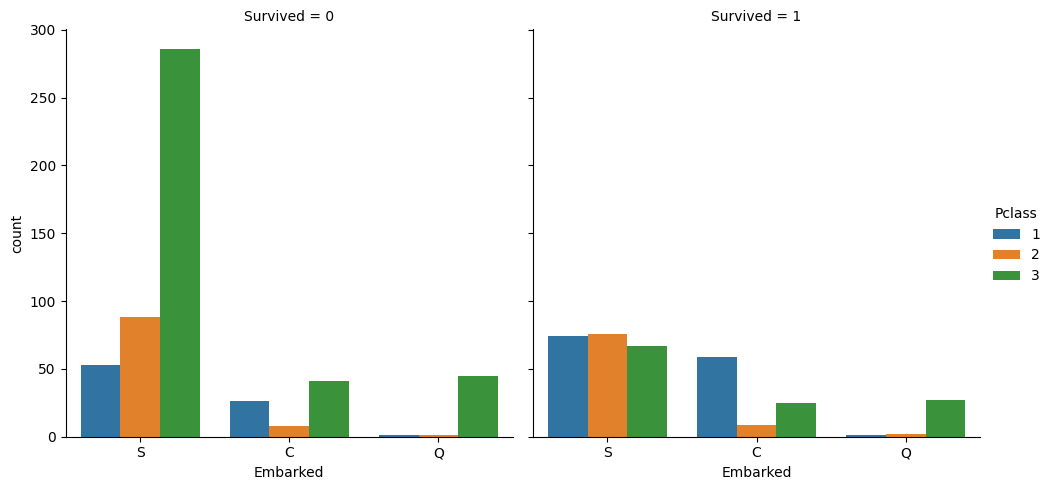

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(data = df3,
            x='Embarked',
            col = 'Survived',
            kind = 'count',
            hue='Pclass'
            )
plt.show()

<ipython-input-117-e031743dd841>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(),annot=True)


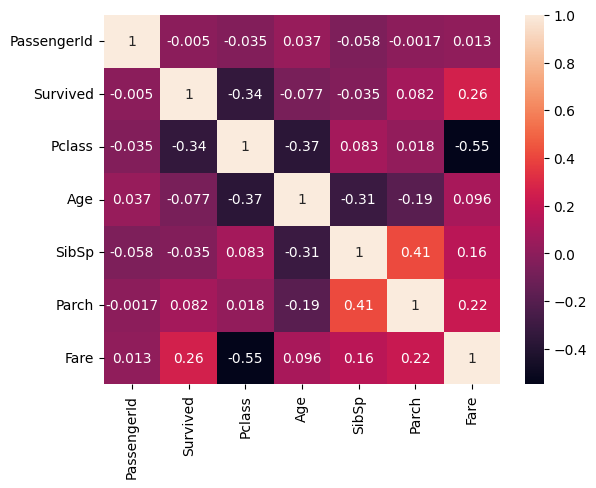

In [117]:
sns.heatmap(df3.corr(),annot=True)
plt.show()